In [137]:
#! pip install tensorflow

In [138]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM, Bidirectional
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from tensorflow.keras.layers import Dense, Dropout, GRU
from tensorflow.keras.optimizers import Adam

from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
import random

We will frame the supervised learning problem as predicting the pollution at the current week (t) given the weather conditions at the prior t-n weeks.

In [139]:
dengue_df = pd.read_csv('../assets/sg_dengue_w_weather_df.csv')
dengue_df.head(3)

,Year,eWeek,Cases,Daily Rainfall Total (mm),Highest 30 Min Rainfall (mm),Highest 60 Min Rainfall (mm),Highest 120 Min Rainfall (mm),Mean Temperature (°C),Maximum Temperature (°C),Minimum Temperature (°C),...,Max Wind Speed (km/h),Year_eWeek,Month,Year_Month,Search Interest,Date,Mean Wind Speed (km/h)_W-6,Weekly Rainfall Total (mm)_W-2,Mean Temperature (°C)_W-3,Search Interest_W-2
0,2014,1,437.0,12.967797,8.641818,10.209091,11.001818,26.932018,31.615,25.110,...,38.394737,2014-1,12,2014-12,48,2014-01-06,NaN,NaN,NaN,NaN
1,2014,2,479.0,57.510169,12.750909,15.549091,18.998182,26.333960,32.165,24.705,...,40.494737,2014-2,1,2014-1,60,2014-01-13,NaN,NaN,NaN,NaN
2,2014,3,401.0,2.672881,2.320000,2.418182,2.432727,26.321053,30.255,25.000,...,43.347368,2014-3,1,2014-1,60,2014-01-20,NaN,12.967797,NaN,48.0


In [140]:
# Create a dataframe for lstm

df_for_lstm = pd.DataFrame()
df_for_lstm['Cases'] = dengue_df['Cases']
df_for_lstm['Date'] = dengue_df['Date']
df_for_lstm['Cases_W-2'] = dengue_df['Cases'].shift(2)
df_for_lstm['Cases_W-3'] = dengue_df['Cases'].shift(3)
#df_for_lstm['Cases_W-4'] = dengue_df['Cases'].shift(4)
df_for_lstm['Mean Wind Speed (km/h)_W-6'] = dengue_df['Mean Wind Speed (km/h)_W-6']
df_for_lstm['Weekly Rainfall Total (mm)_W-6'] = dengue_df['Daily Rainfall Total (mm)'].shift(6)
df_for_lstm['Mean Temperature (°C)_W-3'] = dengue_df['Mean Temperature (°C)_W-3']
df_for_lstm['Search Interest_W-2'] = dengue_df['Search Interest_W-2']

#df_for_lstm['Minimum Temperature (°C)_W-4'] = dengue_df['Minimum Temperature (°C)'].shift(4)
#df_for_lstm['Max Wind Speed (km/h)_W-6'] = dengue_df['Max Wind Speed (km/h)'].shift(6)


df_for_lstm.dropna(inplace=True)
df_for_lstm.head()

,Cases,Date,Cases_W-2,Cases_W-3,Mean Wind Speed (km/h)_W-6,Weekly Rainfall Total (mm)_W-6,Mean Temperature (°C)_W-3,Search Interest_W-2
6,369.0,2014-02-17,234.0,336.0,8.771250,12.967797,25.869173,41.0
7,194.0,2014-02-24,274.0,234.0,7.247024,57.510169,26.200902,38.0
8,187.0,2014-03-03,369.0,274.0,12.207857,2.672881,26.545113,53.0
9,210.0,2014-03-10,194.0,369.0,12.107857,0.000000,27.628571,45.0
10,225.0,2014-03-17,187.0,194.0,12.105714,0.000000,27.646316,44.0


## Modeling

C:\Users\Jia Hui\AppData\Local\Temp\ipykernel_20664\3977164809.py:12: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  train_dates = df_for_lstm['Date'][:len(X_train)]
C:\Users\Jia Hui\AppData\Local\Temp\ipykernel_20664\3977164809.py:13: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  test_dates = df_for_lstm['Date'][len(X_train):]
C:\Users\Jia Hui\Anaconda3\envs\dsi-sg\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to

Epoch 1/70
3/4 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 45221.2891

C:\Users\Jia Hui\Anaconda3\envs\dsi-sg\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


4/4 ━━━━━━━━━━━━━━━━━━━━ 36s 1s/step - loss: 55927.1992 - val_loss: 4703.1729
Epoch 2/70
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 70711.7344 - val_loss: 4675.1104
Epoch 3/70
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 75792.3594 - val_loss: 4639.2871
Epoch 4/70
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 42060.5703 - val_loss: 4593.1826
Epoch 5/70
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 61153.6523 - val_loss: 4539.9175
Epoch 6/70
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 56115.9336 - val_loss: 4473.1201
Epoch 7/70
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 38631.2930 - val_loss: 4331.7715
Epoch 8/70
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 80340.6875 - val_loss: 4022.6304
Epoch 9/70
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 81731.4531 - val_loss: 3131.7778
Epoch 10/70
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 44929.2695 - val_loss: 1538.8350
Epoch 11/70
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 68178.0938 - val_loss: 583.1910
Epoch 12/70
4/4 ━━━━━

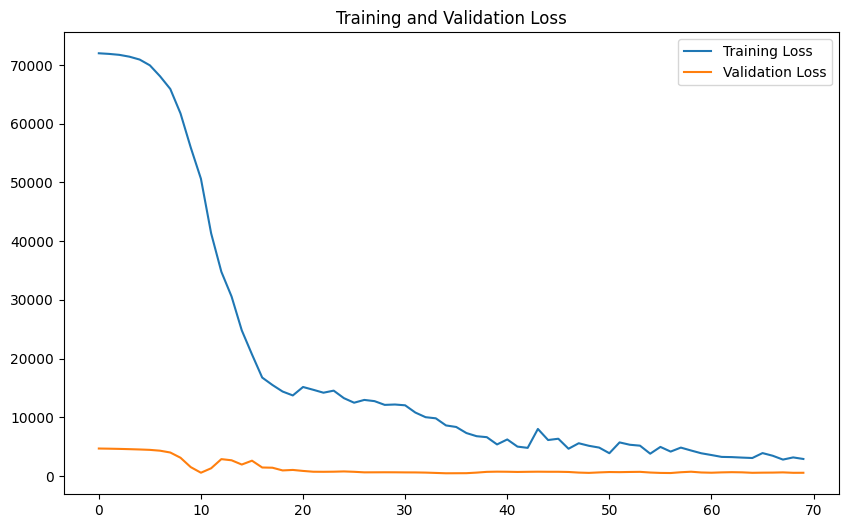

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


In [141]:
random.seed(40)

# Select the features and target variable
features = [col for col in df_for_lstm.columns if not col in ['Cases','Date']]
X = df_for_lstm[features]
y = df_for_lstm[['Cases']].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=0.2)

# Get corresponding dates for train and test sets
train_dates = df_for_lstm['Date'][:len(X_train)]
test_dates = df_for_lstm['Date'][len(X_train):]

# SS the features
ss_X = StandardScaler()
X_train_sc = ss_X.fit_transform(X_train)
X_test_sc = ss_X.transform(X_test)

# SS the target variable
#ss_y = StandardScaler()
#y_train_sc = ss_y.fit_transform(y_train) # cannot ss y 
#y_test_sc = ss_y.transform(y_test)       # cannot ss y 

# Create sequences for the LSTM model
train_sequences = TimeseriesGenerator(X_train_sc, y_train, length=4, batch_size=64) #increase length, change back to 4
test_sequences = TimeseriesGenerator(X_test_sc, y_test, length=4, batch_size=64)    #increase length , why is it better?

# Get input shape for the model
input_shape = train_sequences[0][0].shape[1:]

# Build the LSTM model


model = Sequential()
model.add(Bidirectional(LSTM(100, return_sequences=True, input_shape=input_shape)))
model.add(Dropout(0.2))


model.add(Bidirectional(LSTM(50, return_sequences=True, input_shape=input_shape)))
model.add(Dropout(0.2))

model.add(Bidirectional(LSTM(30, return_sequences=True, input_shape=input_shape)))
model.add(Dropout(0.2))

model.add(Bidirectional(LSTM(20, return_sequences=True, input_shape=input_shape)))
model.add(Dropout(0.2))

model.add(Bidirectional(LSTM(10, return_sequences=False)))
model.add(Dropout(0.2))

# Add dense layers
model.add(Dense(100, activation='linear'))  # Added dense layer
model.add(Dense(50, activation='linear'))  # Another added dense layer
model.add(Dense(10, activation='linear'))  # Another added dense layer

model.add(Dense(1,  activation='linear')) # add more , why is it better?

model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(train_sequences, validation_data=test_sequences, epochs=70, batch_size = 14)
#verbose=0)

#The highest the epochs and lower the batch_size the better 

# Plot the training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Make predictions
predictions = model.predict(test_sequences)

In [148]:
predictions_train = model.predict(train_sequences)
rmse_train = mean_squared_error(y_train[:199], predictions_train, squared = False)

print(f'Train Root Mean Squared Error: {rmse_train}')

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Train Root Mean Squared Error: 82.43359535366982


Root Mean Squared Error: 20.405178163480528


C:\Users\Jia Hui\AppData\Local\Temp\ipykernel_20664\410960975.py:14: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  plt.plot(test_dates[3:46], actual_cases, label='Actual Dengue Cases', color='orange' )
C:\Users\Jia Hui\AppData\Local\Temp\ipykernel_20664\410960975.py:15: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  plt.plot(test_dates[3:46], predicted_cases, label='Predicted Dengue Cases', color='green')


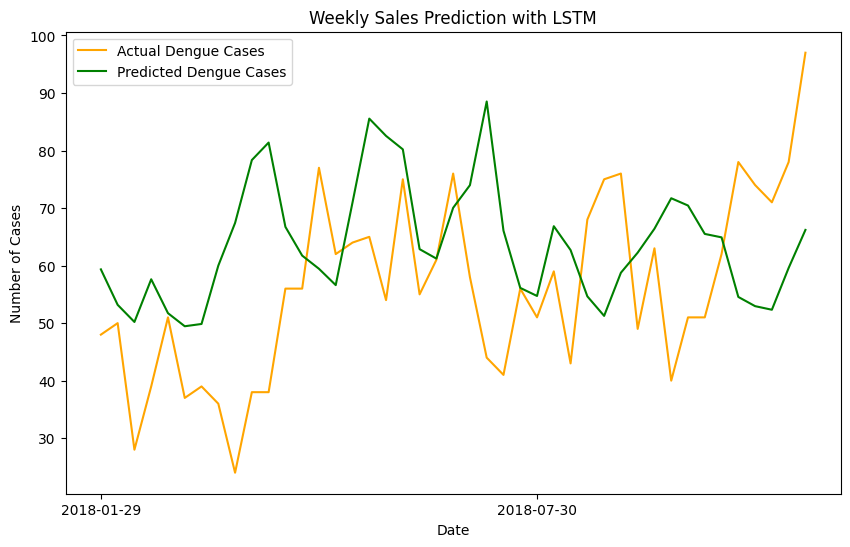

In [143]:
 # Inverse transform the predictions and actual values
predicted_cases = predictions[:43]
y_test = y_test[:56]
actual_cases = y_test[3:46]  # Adjust for the sequence length offset

# Calculate evaluation metrics
rmse = mean_squared_error(actual_cases, predicted_cases , squared = False)

print(f'Root Mean Squared Error: {rmse}')


# Plot the actual vs predicted values with dates on the x-axis
plt.figure(figsize=(10, 6))
plt.plot(test_dates[3:46], actual_cases, label='Actual Dengue Cases', color='orange' )
plt.plot(test_dates[3:46], predicted_cases, label='Predicted Dengue Cases', color='green')
plt.title('Weekly Sales Prediction with LSTM')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(26))
plt.legend()
plt.show()

In [ ]:
# Plot the actual vs predicted values with dates on the x-axis
plt.figure(figsize=(10, 6))
plt.plot(train_dates, y_train, label='Train')
plt.plot(test_dates[3:46], actual_cases, label='Test')
plt.plot(test_dates[3:46], predicted_cases, label='Prediction')
plt.title('Actual vs Predicted Dengue Cases')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(52))
plt.legend()
plt.show()

In [ ]:
# Define rolling window parameters
window_size = 10  # Size of the rolling window
step_size = 1  # Step size for the rolling window

# Initialize lists to store results
predicted_cases_all = []
actual_cases_all = []
dates_all = []

# Rolling window loop
for start in range(0, len(X) - window_size, step_size):
    end = start + window_size
    X_train = X[start:end]
    y_train = y[start:end]
    X_test = X[end:end + step_size]
    y_test = y[end:end + step_size]

    # Normalize the features
    ss_X = StandardScaler()
    X_train_sc = ss_X.fit_transform(X_train)
    X_test_sc = ss_X.transform(X_test)

    
    train_dates = df_for_lstm['Date'][start:end]
    test_dates = df_for_lstm['Date'][end:end + step_size]

    if len(X_test) == 0:
        break

    # Create sequences for the LSTM model
    train_sequences = TimeseriesGenerator(X_train_sc, y_train, length=3, batch_size=64)
    test_sequences = TimeseriesGenerator(X_test_sc, y_test, length=3, batch_size=64)

    # Get input shape for the model
    input_shape = train_sequences[0][0].shape[1:]

    # Build the LSTM model
    model = Sequential()
    model.add(LSTM(50, return_sequences=True, input_shape=input_shape))
    model.add(Dropout(0.2))
    model.add(LSTM(50, return_sequences=False))
    model.add(Dropout(0.2))
    model.add(Dense(1))

    model.compile(optimizer='adam', loss='mean_squared_error')

    # Train the model
    #history = model.fit(train_sequences, epochs=10,batch=64)
    history = model.fit(train_sequences, validation_data=test_sequences, epochs=10, batch_size = 64)

    # Make predictions
    predictions = model.predict(test_sequences)
    
    # Inverse transform the predictions and actual values
    predicted_cases = ss_y.inverse_transform(predictions)
    actual_cases = ss_y.inverse_transform(y_test[3:3 + len(predictions)])
    
    # Store results
    predicted_cases_all.extend(predicted_cases.flatten())
    actual_cases_all.extend(actual_cases.flatten())
    dates_all.extend(test_dates[3:3 + len(predictions)])

# Convert lists to arrays
predicted_cases_all = np.array(predicted_cases_all)
actual_cases_all = np.array(actual_cases_all)
dates_all = np.array(dates_all)

# Calculate evaluation metrics
mse = mean_squared_error(actual_cases_all, predicted_cases_all)
print(f'Mean Squared Error: {mse}')

# Plot the actual vs predicted values with dates on the x-axis
plt.figure(figsize=(10, 6))
plt.plot(dates_all, actual_cases_all, label='Actual Dengue Cases')
plt.plot(dates_all, predicted_cases_all, label='Predicted Dengue Cases')
plt.title('Actual vs Predicted Dengue Cases with Rolling Window')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.legend()
plt.show()